In [1]:
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [2]:
plt.style.use('ggplot')

In [3]:
import warnings; warnings.filterwarnings('ignore')
from nsepy import get_history as gh

## Fetch The Historical Data

In [4]:
# setting start and end dates and fetching the 6-years historical data
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2018,12,31)
df_stock = gh(symbol='SBIN', start=start, end=end)# SBIN stands for State Bank of India

df_stock.head()

W0706 08:21:25.875956 123145626042368 connectionpool.py:274] Connection pool is full, discarding connection: www1.nseindia.com
W0706 08:21:25.876727 123145562980352 connectionpool.py:274] Connection pool is full, discarding connection: www1.nseindia.com
W0706 08:21:25.877048 123145509355520 connectionpool.py:274] Connection pool is full, discarding connection: www1.nseindia.com
W0706 08:21:25.879280 123145605021696 connectionpool.py:274] Connection pool is full, discarding connection: www1.nseindia.com
W0706 08:21:25.879761 123145615532032 connectionpool.py:274] Connection pool is full, discarding connection: www1.nseindia.com
W0706 08:21:25.881156 123145552470016 connectionpool.py:274] Connection pool is full, discarding connection: www1.nseindia.com
W0706 08:21:25.881882 123145530376192 connectionpool.py:274] Connection pool is full, discarding connection: www1.nseindia.com
W0706 08:21:26.479666 123145605021696 connectionpool.py:274] Connection pool is full, discarding connection: ww

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2013-01-01,SBIN,EQ,2385.50,2404.9,2434.05,2397.55,2425.3,2426.45,2423.75,1720230,4.169403e+14,64215,662638,0.3852
2013-01-02,SBIN,EQ,2426.45,2450.0,2464.00,2438.15,2451.9,2450.55,2453.53,1466012,3.596900e+14,61823,508795,0.3471
2013-01-03,SBIN,EQ,2450.55,2460.0,2482.40,2436.20,2470.7,2471.60,2465.12,2010309,4.955653e+14,71411,820537,0.4082
2013-01-04,SBIN,EQ,2471.60,2460.0,2492.95,2450.65,2490.0,2486.70,2475.69,1370595,3.393164e+14,62637,231546,0.1689
2013-01-07,SBIN,EQ,2486.70,2490.0,2499.00,2461.75,2465.0,2467.60,2481.24,1026449,2.546866e+14,48683,269798,0.2628


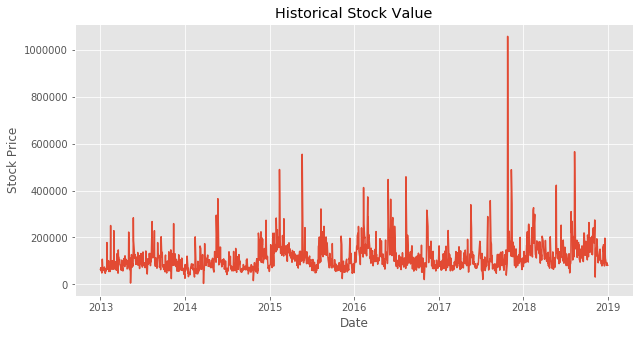

In [5]:
# visualizing the fetched data
plt.figure(figsize=(10,5))
plt.plot(df_stock['Trades'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel(f'Stock Price')
plt.show()

## Preprocess The Data

In [6]:
df_stock['Date'] = df_stock.index
data_columns = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data_columns['Date'] = df_stock['Date']
data_columns['Open'] = df_stock['Open']
data_columns['High'] = df_stock['High']
data_columns['Low'] = df_stock['Low']
data_columns['Close'] = df_stock['Close']
train_set = data_columns.iloc[:, 1:2].values # open column
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []

for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0]) # step-one data
    y_train.append(training_set_scaled[i, 0]) 

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Define The LSTM Recurrent Model

In [7]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

## Train The Model

In [8]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

Train on 1422 samples
Epoch 1/15
1422/1422 [==============================] - 16s 11ms/sample - loss: 0.0239
Epoch 2/15
1422/1422 [==============================] - 8s 5ms/sample - loss: 0.0083
Epoch 3/15
1422/1422 [==============================] - 8s 6ms/sample - loss: 0.0080
Epoch 4/15
1422/1422 [==============================] - 8s 6ms/sample - loss: 0.0061
Epoch 5/15
1422/1422 [==============================] - 8s 6ms/sample - loss: 0.0060
Epoch 6/15
1422/1422 [==============================] - 7s 5ms/sample - loss: 0.0061
Epoch 7/15
1422/1422 [==============================] - 8s 5ms/sample - loss: 0.0059
Epoch 8/15
1422/1422 [==============================] - 7s 5ms/sample - loss: 0.0048
Epoch 9/15
1422/1422 [==============================] - 7s 5ms/sample - loss: 0.0054
Epoch 10/15
1422/1422 [==============================] - 7s 5ms/sample - loss: 0.0045
Epoch 11/15
1422/1422 [==============================] - 7s 5ms/sample - loss: 0.0045
Epoch 12/15
1422/1422 [================

## Test The Model

In [9]:
# fetching the test data and preprocessing
df_stock_test = gh(symbol='SBIN',start=datetime.datetime(2019,1,1), end=datetime.datetime(2019,9,18))
df_stock_test['Date'] = df_stock_test.index
data_columns_test = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data_columns_test['Date'] = df_stock_test['Date']
data_columns_test['Open'] = df_stock_test['Open']
data_columns_test['High'] = df_stock_test['High']
data_columns_test['Low'] = df_stock_test['Low']
data_columns_test['Close'] = df_stock_test['Close']
real_stock_price = data_columns_test.iloc[:, 1:2].values
dataset_total = pd.concat((data_columns['Open'], data_columns_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(data_columns_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [10]:
# making predictions on the test data
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

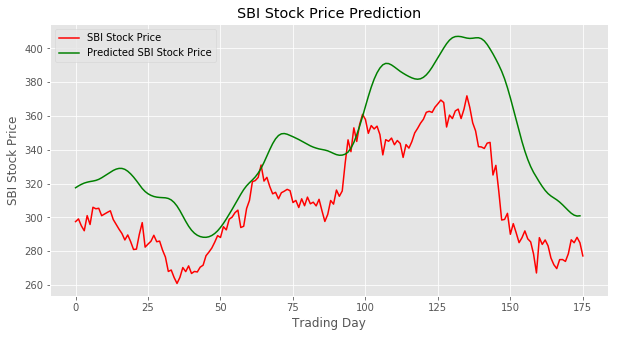

In [11]:
# visualizing the prediction
plt.figure(figsize=(10,5))
plt.plot(real_stock_price, color = 'red', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

---